### Preyecto Hotel Booking - Análisis y Predicción de Cancelaciones 

#### Introducción:

El sector hotelero es uno de los pilares fundamentales de la industria turística. Con el crecimiento constante de la industria, la gestión eficiente de los hoteles se vuelve cada vez más crucial. En este contexto, el análisis de datos se ha convertido en una herramienta invaluable para comprender mejor las tendencias, los patrones y los factores que afectan el desempeño y la operación de los hoteles. En este estudio, se analizará el conjunto de datos de reservas de hotel para extraer información significativa que pueda ayudar a mejorar la gestión y minimizar cancelaciones para evitar perdidas de rentabilidad. 

#### Objetivo:

Generar un modelo de clasificación para intentar predecir las cancelaciones en base a diversas variables. 

#### Aspectos a estudiar:

- La cantidad de días de anticipación con la que se realiza una reserva influirá significativamente en la probabilidad de cancelación de la reserva.
- El tipo de deposito requerido afectará la propensión a cancelar una reserva, siendo las reservas sin depósito más propensas a cancelarse.
- El tipo de cliente puede tener una relación con la frecuencia de cancelaciones, siendo los clientes corporativos menos propensos a cancelar que los clientes transientes.
- La disponibilidad de estacionamiento puede influir en la decisión de cancelar una reserva, especialmente para huéspedes que viajan en automóvil.
- El número total de solicitudes especiales puede estar correlacionado con la satisfacción del cliente y, por lo tanto, con la probabilidad de cancelación de la reserva.

Fuente: https://www.kaggle.com/datasets/mojtaba142/hotel-booking

#### Nombre y definición de variables

- **hotel**: El nombre del hotel.
- **is_canceled**: Indica si la reserva fue cancelada (1) o no (0).
- **lead_time**: El número de días que pasaron desde la fecha de reserva hasta la fecha de llegada.
- **arrival_date_year**: El año de llegada.
- **arrival_date_month**: El mes de llegada.
- **arrival_date_week_number**: El número de semana del año en que llegaron los huéspedes.
- **arrival_date_day_of_month**: El día del mes de llegada.
- **stays_in_weekend_nights**: El número de noches que el cliente se quedó durante los fines de semana.
- **stays_in_week_nights**: El número de noches que el cliente se quedó durante la semana.
- **adults**: El número de adultos en la reserva.
- **children**: El número de niños en la reserva.
- **babies**: El número de bebés en la reserva.
- **meal**: El tipo de comida reservada.
- **country**: El país de origen del cliente.
- **market_segment**: El segmento de mercado al que pertenece la reserva.
- **distribution_channel**: El canal de distribución utilizado para realizar la reserva.
- **is_repeated_guest**: Indica si el cliente es un huésped repetido (1) o no (0).
- **previous_cancellations**: El número de reservas canceladas por el cliente previamente.
- **previous_bookings_not_canceled**: El número de reservas previas que no fueron canceladas por el cliente.
- **reserved_room_type**: El tipo de habitación reservada.
- **assigned_room_type**: El tipo de habitación asignada al cliente.
- **booking_changes**: El número de cambios realizados en la reserva desde su creación hasta el check-in o cancelación.
- **deposit_type**: El tipo de depósito realizado para la reserva.
- **agent**: El ID del agente que realizó la reserva.
- **company**: El ID de la compañía que realizó la reserva.
- **days_in_waiting_list**: El número de días que la reserva estuvo en la lista de espera antes de ser confirmada.
- **customer_type**: El tipo de cliente (por ejemplo, contractual, grupo, transitorios, etc.).
- **adr**: Tasa diaria promedio, indica el precio medio de una habitación por noche.
- **required_car_parking_spaces**: El número de plazas de aparcamiento requeridas por el cliente.
- **total_of_special_requests**: El número total de peticiones especiales realizadas por el cliente.
- **reservation_status**: El estado de la reserva (por ejemplo, Confirmado, Cancelado, etc.).
- **reservation_status_date**: La fecha en que se actualizó el estado de la reserva.
- **credit_card?**: Indica si se utilizó una tarjeta de crédito para realizar la reserva.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuraraciones
pd.set_option('display.max_columns', None)

In [3]:
# Se carga el Dataset
data_hotel_booking = pd.read_csv('../data/hotel_booking.csv')

In [4]:
hotel_booking = data_hotel_booking

In [5]:
hotel_booking.shape

(119390, 36)

In [6]:
# variables del dataset
lista_variables = hotel_booking.columns.tolist()
print(lista_variables)  

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'name', 'email', 'phone-number', 'credit_card']


In [7]:
hotel_booking.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
54872,City Hotel,1,386,2016,July,31,28,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.0,0,0,Canceled,2015-10-21,Cheryl Powell,Cheryl.Powell@verizon.com,450-181-1778,************2370
32831,Resort Hotel,0,159,2017,February,5,4,2,1,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,37.8,0,3,Check-Out,2017-02-07,Keith Davis,Davis.Keith@yahoo.com,842-358-6799,************3818
5570,Resort Hotel,0,199,2016,May,19,2,1,1,1,0.0,0,HB,DEU,Groups,TA/TO,0,0,0,A,A,1,No Deposit,298.0,NaN,0,Transient-Party,54.5,0,1,Check-Out,2016-05-04,Eric Fry,EFry86@verizon.com,853-844-9905,************2451


In [8]:
print(hotel_booking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
transf_var_categoricas = ['is_canceled', 'is_repeated_guest']  

hotel_booking[transf_var_categoricas] = hotel_booking[transf_var_categoricas].astype('category')

In [10]:
# Se crea la tabla de fecha uniendo las columnas
hotel_booking['arrival_date'] = pd.to_datetime(hotel_booking['arrival_date_year'].astype(str) + '-' + hotel_booking['arrival_date_month'] + '-' + hotel_booking['arrival_date_day_of_month'].astype(str))

In [11]:
# se eliminan las columnas innecesarias para el analisis
hotel_booking = hotel_booking.drop(columns=['phone-number','email', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month' ])

In [12]:
# se modifican los valores a enteros
columas = ['children', 'agent']

for column in columas:
    hotel_booking[column] = hotel_booking[column].astype(str).str.replace('.0', '', regex=False)

In [13]:
hotel_booking.sample(3)

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,credit_card,arrival_date
12562,Resort Hotel,1,217,2,5,2,0,0,HB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240,NaN,0,Transient,162.86,0,1,Canceled,2017-02-10,Ashley Hobbs,************4517,2017-07-04
50304,City Hotel,1,295,0,2,2,0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21,Chad White,************7693,2016-04-28
31335,Resort Hotel,0,118,1,4,2,0,0,BB,CHN,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240,NaN,0,Transient-Party,55.80,0,1,Check-Out,2016-12-24,Walter Brown,************9661,2016-12-19


### Exploracion de variables


In [14]:
print(hotel_booking.describe())

           lead_time  stays_in_weekend_nights  stays_in_week_nights  \
count  119390.000000            119390.000000         119390.000000   
mean      104.011416                 0.927599              2.500302   
std       106.863097                 0.998613              1.908286   
min         0.000000                 0.000000              0.000000   
25%        18.000000                 0.000000              1.000000   
50%        69.000000                 1.000000              2.000000   
75%       160.000000                 2.000000              3.000000   
max       737.000000                19.000000             50.000000   

              adults         babies  previous_cancellations  \
count  119390.000000  119390.000000           119390.000000   
mean        1.856403       0.007949                0.087118   
std         0.579261       0.097436                0.844336   
min         0.000000       0.000000                0.000000   
25%         2.000000       0.000000          

In [15]:
print(hotel_booking.nunique())

hotel                                 2
is_canceled                           2
lead_time                           479
stays_in_weekend_nights              17
stays_in_week_nights                 35
adults                               14
children                              6
babies                                5
meal                                  5
country                             177
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       73
reserved_room_type                   10
assigned_room_type                   12
booking_changes                      21
deposit_type                          3
agent                               334
company                             352
days_in_waiting_list                128
customer_type                         4
adr                                8879
required_car_parking_spaces           5


In [16]:
print(hotel_booking.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_par

#### Variables Categoricas

In [17]:
# Se visualiza la variable hotel
hotel = hotel_booking['hotel'].unique()
print(hotel)

['Resort Hotel' 'City Hotel']


In [18]:
# Se visualiza la variable is_canceled
cancelado = hotel_booking['is_canceled'].unique()
print(cancelado)

[0, 1]
Categories (2, int64): [0, 1]


In [19]:
# Se visualiza la variable meal
meal = hotel_booking['meal'].unique()
print(meal)

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [20]:
# Se visualiza la variable
adults = hotel_booking['adults'].unique()
print(adults)

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


In [21]:
# Se visualiza la variable children
children = hotel_booking['children'].unique()
print(children)

['0' '1' '2' '10' '3' 'nan']


In [22]:
# Se visualiza la variable babies
babies = hotel_booking['babies'].unique()
print(babies)

[ 0  1  2 10  9]


In [23]:
# Se visualiza la variable country
country = hotel_booking['country'].unique()
print(country)

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [24]:
# Se visualiza la variable market_segment
market_segment = hotel_booking['market_segment'].unique()
print(market_segment)

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [25]:
# Se visualiza la variable distribution_channel
distribution_channel = hotel_booking['distribution_channel'].unique()
print(distribution_channel)

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [26]:
# Se visualiza la variable agent
agent = hotel_booking['agent'].unique()
print(agent)

['nan' '304' '240' '303' '15' '241' '8' '250' '115' '5' '175' '134' '156'
 '243' '242' '3' '105' '40' '147' '306' '184' '96' '2' '127' '95' '146'
 '9' '177' '6' '143' '244' '149' '167' '300' '171' '305' '67' '196' '152'
 '142' '261' '104' '36' '26' '29' '258' '110' '71' '181' '88' '251' '275'
 '69' '248' '208' '256' '314' '126' '281' '273' '253' '185' '330' '334'
 '328' '326' '321' '324' '313' '38' '155' '68' '335' '308' '332' '94'
 '348' '310' '339' '375' '66' '327' '387' '298' '91' '245' '385' '257'
 '393' '168' '405' '249' '315' '75' '128' '307' '11' '436' '1' '201' '183'
 '223' '368' '336' '291' '464' '411' '481' '10' '154' '468' '410' '390'
 '440' '495' '492' '493' '434' '57' '531' '420' '483' '526' '472' '429'
 '16' '446' '34' '78' '139' '252' '270' '47' '114' '301' '193' '182' '135'
 '350' '195' '352' '355' '159' '363' '384' '360' '331' '367' '64' '406'
 '163' '414' '333' '427' '431' '430' '426' '438' '433' '418' '441' '282'
 '432' '72' '450' '180' '454' '455' '59' '451' '254' '

In [27]:
# Se visualiza la variable customer_type
customer_type = hotel_booking['customer_type'].unique()
print(customer_type)

['Transient' 'Contract' 'Transient-Party' 'Group']


In [28]:
# Se visualiza la variable reservation_status
reservation_status = hotel_booking['reservation_status'].unique()
print(reservation_status)

['Check-Out' 'Canceled' 'No-Show']


In [29]:
# Se visualiza la variable reservation_status
reserved_room_type = hotel_booking['reserved_room_type'].unique()
print(reserved_room_type)

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [30]:
# Se visualiza la variable previous_cancellations
reserved_room_type = hotel_booking['reserved_room_type'].unique()
print(reserved_room_type) 

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [31]:
# Se visualiza la variable previous_cancellations
assigned_room_type = hotel_booking['assigned_room_type'].unique()
print(assigned_room_type) 

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


In [32]:
# Se visualiza la variable previous_cancellations
reservation_status = hotel_booking['reservation_status'].unique()
print(reservation_status) 

['Check-Out' 'Canceled' 'No-Show']


In [33]:
# Se visualiza la variable previous_cancellations
customer_type = hotel_booking['customer_type'].unique()
print(customer_type) 

['Transient' 'Contract' 'Transient-Party' 'Group']


In [34]:
# Se visualiza la variable deposit_type
deposit_type = hotel_booking['deposit_type'].unique()
print(deposit_type) 

['No Deposit' 'Refundable' 'Non Refund']


#### Variables Booleanas

In [35]:
# Se visualiza la variable is_repeated_guest
is_repeated_guest = hotel_booking['is_repeated_guest'].unique()
print(is_repeated_guest)

[0, 1]
Categories (2, int64): [0, 1]


In [36]:
# Se visualiza la variable is_canceled
is_canceled = hotel_booking['is_canceled'].unique()
print(is_canceled)

[0, 1]
Categories (2, int64): [0, 1]


#### Variables con fecha y numéricas

In [37]:
# La fecha en que se actualizó el estado de la reserva
print("Fecha mínima:", hotel_booking['reservation_status_date'].min())
print("Fecha máxima:", hotel_booking['reservation_status_date'].max())

Fecha mínima: 2014-10-17
Fecha máxima: 2017-09-14


In [38]:
# Se visualiza la variable previous_cancellations
babies = hotel_booking['babies'].unique()
print(babies)

[ 0  1  2 10  9]


In [39]:
# Se visualiza la variable previous_cancellations
children = hotel_booking['children'].unique()
print(children)

['0' '1' '2' '10' '3' 'nan']


###### Eliminacion de nulos en la variable "children"

In [40]:
# se realiza una tabla de frecuencia para ver la cantidad de valores 'nan'
children_frec = hotel_booking['children'].value_counts()
print(children_frec)

0      110796
1        4861
2        3652
3          76
nan         4
10          1
Name: children, dtype: int64


In [41]:
# Se eliminan los valores 'nan' 
hotel_booking = hotel_booking[hotel_booking['children'] != 'nan']
hotel_booking['children'] = hotel_booking['children'].astype(int)

In [42]:
# Se visualiza la variable previous_cancellations
adults = hotel_booking['adults'].unique()
print(adults)

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]


In [43]:
# Se visualiza la variable previous_cancellations
previous_cancellations = hotel_booking['previous_cancellations'].unique()
print(previous_cancellations)

[ 0  1  2  3 26 25 14  4 24 19  5 21  6 13 11]


In [44]:
# Se visualiza la variable previous_cancellations
previous_bookings_not_canceled = hotel_booking['previous_bookings_not_canceled'].unique()
print(previous_bookings_not_canceled) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 27 28 29 30 19 26 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


In [45]:
# Se visualiza la variable total_of_special_requests
total_of_special_requests = hotel_booking['total_of_special_requests'].unique()
print(total_of_special_requests) 

[0 1 3 2 4 5]


In [46]:
# Se visualiza la variable required_car_parking_spaces
required_car_parking_spaces = hotel_booking['required_car_parking_spaces'].unique()
print(required_car_parking_spaces) 

[0 1 2 8 3]


In [47]:
# Se visualiza la variable booking_changes
booking_changes = hotel_booking['booking_changes'].unique()
print(booking_changes) 

[ 3  4  0  1  2  5 17  6  8  7 10 16  9 13 12 20 14 15 11 21 18]


In [48]:
# Se visualiza la variable adr
adr = hotel_booking['adr'].unique()
print(adr) 

[  0.    75.    98.   ... 266.75 209.25 157.71]


### Visualizaciones

#### Cantidad de cancelaciones

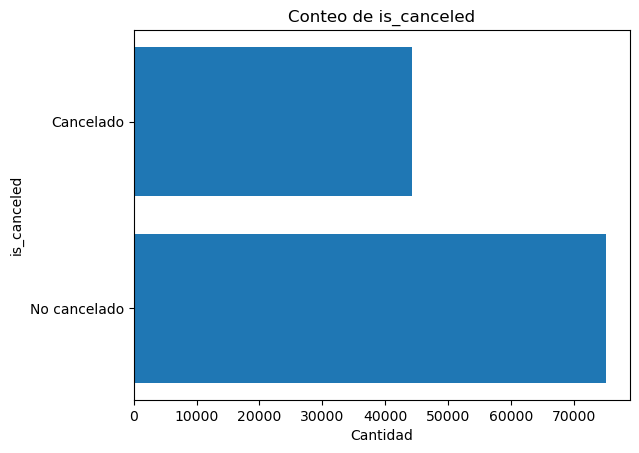

In [52]:
cantidad_cancel = hotel_booking['is_canceled'].value_counts()

plt.barh(cantidad_cancel.index, cantidad_cancel.values)
plt.xlabel('Cantidad')
plt.ylabel('is_canceled')
plt.title('Conteo de cancelaciones')
plt.yticks([0, 1], ['No cancelado', 'Cancelado'])
plt.show()

#### Top 10 de los paises de origen de los clientes que cancelan

In [ ]:
top_countries = hotel_booking['country'].value_counts().nlargest(10).index
filtro_top_countries = hotel_booking[hotel_booking['country'].isin(top_countries)]
filtro_top_countries_canc = filtro_top_countries[filtro_top_countries['is_canceled'] == 1]

# Gráfico
sns.countplot(x='country', data=filtro_top_countries)
plt.show()

#### Cancelaciones por tipo de cliente

In [ ]:
sns.countplot(x='customer_type', hue='is_canceled', data=hotel_booking)
plt.show()

#### Relación entre variables numéricas

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = hotel_booking.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Visualización de outliers 
sns.boxplot(x='lead_time', data=hotel_booking)
plt.show()

sns.boxplot(x='adr', data=hotel_booking)
plt.show()


In [ ]:
# lead_time - eliminacion de outliers 
Q1_lead_time = hotel_booking['lead_time'].quantile(0.25)
Q3_lead_time = hotel_booking['lead_time'].quantile(0.75)
IQR_lead_time = Q3_lead_time - Q1_lead_time
inf_lead_time = Q1_lead_time - 1.5 * IQR_lead_time
sup_lead_time = Q3_lead_time + 1.5 * IQR_lead_time
hotel_booking_lead_out = hotel_booking[(hotel_booking['lead_time'] > inf_lead_time) & (hotel_booking['lead_time'] < sup_lead_time)]

#print(inf_lead_time)
#print(sup_lead_time)

sns.boxplot(x='lead_time', data=hotel_booking_lead_out)
plt.show()



In [ ]:
hotel_booking_lead_out['lead_time'].max()

In [ ]:
# adr - eliminacion de outliers 
Q1_adr = hotel_booking['adr'].quantile(0.25)
Q3_adr = hotel_booking['adr'].quantile(0.75)
IQR_adr = Q3_adr - Q1_adr
inf_adr = Q1_adr - 1.5 * IQR_adr
sup_adr = Q3_adr + 1.5 * IQR_adr
hotel_booking_adr_out = hotel_booking[(hotel_booking['adr'] > inf_adr) & (hotel_booking['adr'] < sup_adr) & (hotel_booking['adr'] != 0)]

sns.boxplot(x='adr', data=hotel_booking_adr_out)
plt.show()


In [ ]:
plt.hist(hotel_booking_adr_out['adr'], bins=20, color='blue', alpha=0.7)
plt.xlabel('ADR')
plt.ylabel('Frecuencia')
plt.title('Histograma de ADR')
plt.grid(True)
plt.show()